# Calculating EFP values

In [1]:
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import functions.eddy_feedback as ef

### Calculate regridded EFP values

In [17]:
# path = '/home/links/ct715/data_storage/PAMIP/processed_monthly/regridded_3x3/1.1_pdSST-pdSIC'
# files = os.listdir(path)
# files = [f for f in files if f.endswith('.nc')]
# files.sort()
# model_list = [os.path.basename(f).split('_')[0] for f in files]

# ds = {}
# for model in model_list:
#     dataset = xr.open_mfdataset(os.path.join(path, f'{model}_*.nc'))
#     ds[model] = dataset

# efp_data = []

# for model in model_list:
#     dataset = ds[model]
#     efp_nh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=False)
#     efp_sh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=True)
    
#     efp_data.append({'model': model, 'efp_nh': efp_nh, 'efp_sh': efp_sh})

# efp_df = pd.DataFrame(efp_data)
# efp_df.to_csv('./data/regridded_3x3_efp.csv')

### Calculate NON-regridded EFP values

In [ ]:
# path = '/home/links/ct715/data_storage/PAMIP/processed_monthly/efp_pd_non-regridded'
# files = os.listdir(path)
# files = [f for f in files if f.endswith('.nc')]
# files.sort()
# model_list = [os.path.basename(f).split('_')[0] for f in files]

# ds = {}
# for model in model_list:
#     dataset = xr.open_mfdataset(os.path.join(path, f'{model}_*.nc'))
#     ds[model] = dataset

# efp_data = []

# for model in model_list:
#     dataset = ds[model]
#     efp_nh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=False)
#     efp_sh = ef.calculate_efp(dataset, data_type='pamip', calc_south_hemis=True)
    
#     efp_data.append({'model': model, 'efp_nh': efp_nh, 'efp_sh': efp_sh})

# efp_df = pd.DataFrame(efp_data)
# efp_df.to_csv('./data/non-regridded_efp.csv')


,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1297,0.0295
1,CESM2,0.3693,0.3419
2,CNRM-CM6-1,0.2421,0.2082
3,CanESM5,0.4256,0.4618
4,E3SMv1,0.0543,0.0542
5,EC-EARTH3,0.2945,0.3135
6,ECHAM6.3,0.0139,0.0103
7,FGOALS-f3-L,0.2354,0.1274
8,HadGEM3-GC31-LL,0.2730,0.2951
9,HadGEM3-GC31-MM,0.3137,0.3002


In [18]:
df = pd.read_csv('./data/regridded_3x3_efp.csv', index_col=0)
df

,model,efp_nh,efp_sh
0,CESM1-WACCM-SC,0.1421,0.0303
1,CESM2,0.4132,0.3714
2,CNRM-CM6-1,0.2771,0.2492
3,CanESM5,0.4446,0.4808
4,E3SMv1,0.0589,0.0588
5,EC-EARTH3,0.3467,0.3621
6,ECHAM6.3,0.0144,0.0104
7,FGOALS-f3-L,0.2642,0.1512
8,HadGEM3-GC31-LL,0.3168,0.3412
9,HadGEM3-GC31-MM,0.3757,0.3621


In [19]:
ep_flux_freq = {
    "CESM2": "30 min",
    "CanESM5": "6-hourly",
    "CNRM-CM6-1": "daily",
    "E3SMv1": "daily",
    "EC-EARTH3": "6-hourly",
    "ECHAM6.3": "6-hourly",
    "FGOALS-f3-L": "daily",
    "HadGEM3-GC31-MM": "20 min",
    "HadGEM3-GC31-LL": "20 min",
    "IPSL-CM6A-LR": "daily",
    "MIROC6": "daily",
    "NorESM2-LM": "30 min",
    "OpenIFS-159": "6-hourly",
    "OpenIFS-511": "6-hourly",
    "CESM1-WACCM-SC": "daily"
}

# Create a DataFrame from the dictionary
df_freq = pd.DataFrame(list(ep_flux_freq.items()), columns=["model", "EP flux freq."])
df_freq = df_freq[df_freq["model"].isin(df["model"])]
# df_freq

# # Merge with feedback DataFrame
df_com = pd.merge(df, df_freq, on="model", how="left")
df_com

,model,efp_nh,efp_sh,EP flux freq.
0,CESM1-WACCM-SC,0.1421,0.0303,daily
1,CESM2,0.4132,0.3714,30 min
2,CNRM-CM6-1,0.2771,0.2492,daily
3,CanESM5,0.4446,0.4808,6-hourly
4,E3SMv1,0.0589,0.0588,daily
5,EC-EARTH3,0.3467,0.3621,6-hourly
6,ECHAM6.3,0.0144,0.0104,6-hourly
7,FGOALS-f3-L,0.2642,0.1512,daily
8,HadGEM3-GC31-LL,0.3168,0.3412,20 min
9,HadGEM3-GC31-MM,0.3757,0.3621,20 min


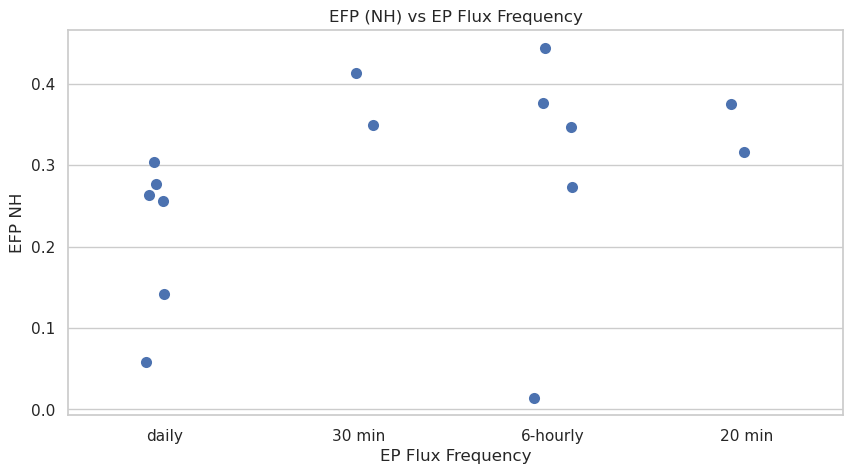

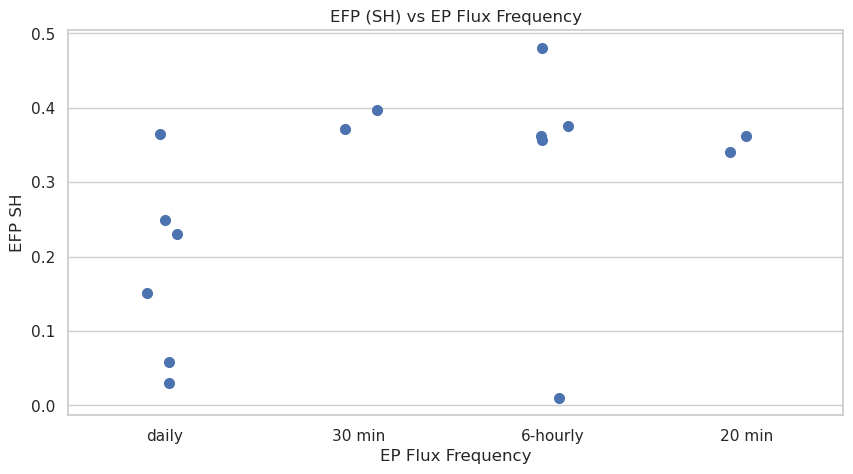

In [20]:
df = df_com

# Set the plot style
sns.set(style="whitegrid")

# Scatter plot for efp_nh
plt.figure(figsize=(10, 5))
sns.stripplot(x='EP flux freq.', y='efp_nh', data=df, jitter=True, size=8)
plt.title("EFP (NH) vs EP Flux Frequency")
plt.ylabel("EFP NH")
plt.xlabel("EP Flux Frequency")
plt.show()

# Scatter plot for efp_sh
plt.figure(figsize=(10, 5))
sns.stripplot(x='EP flux freq.', y='efp_sh', data=df, jitter=True, size=8)
plt.title("EFP (SH) vs EP Flux Frequency")
plt.ylabel("EFP SH")
plt.xlabel("EP Flux Frequency")
plt.show()

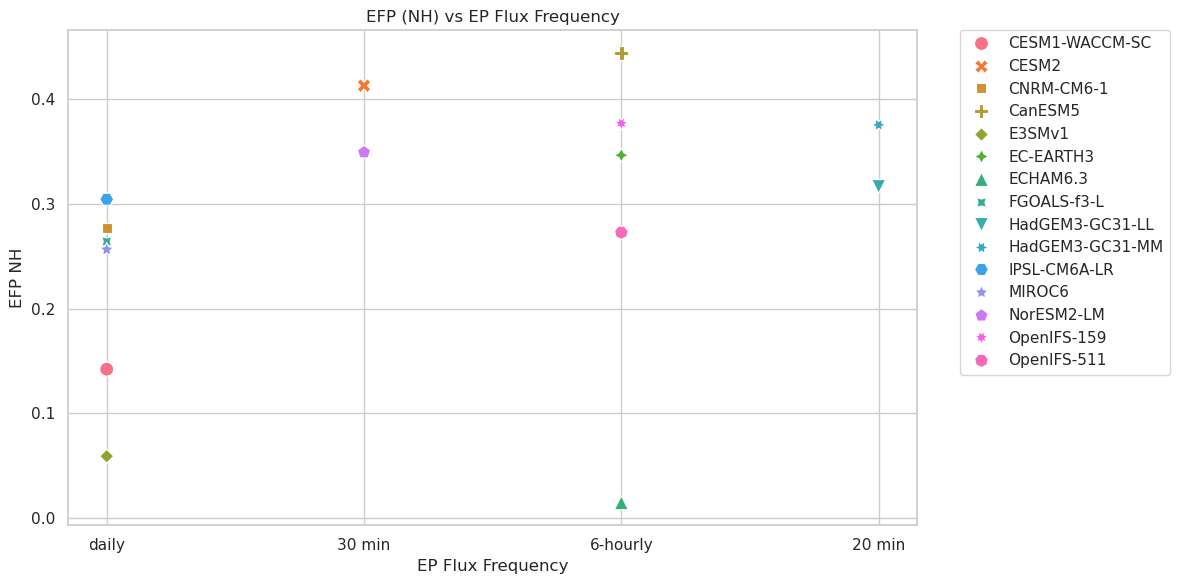

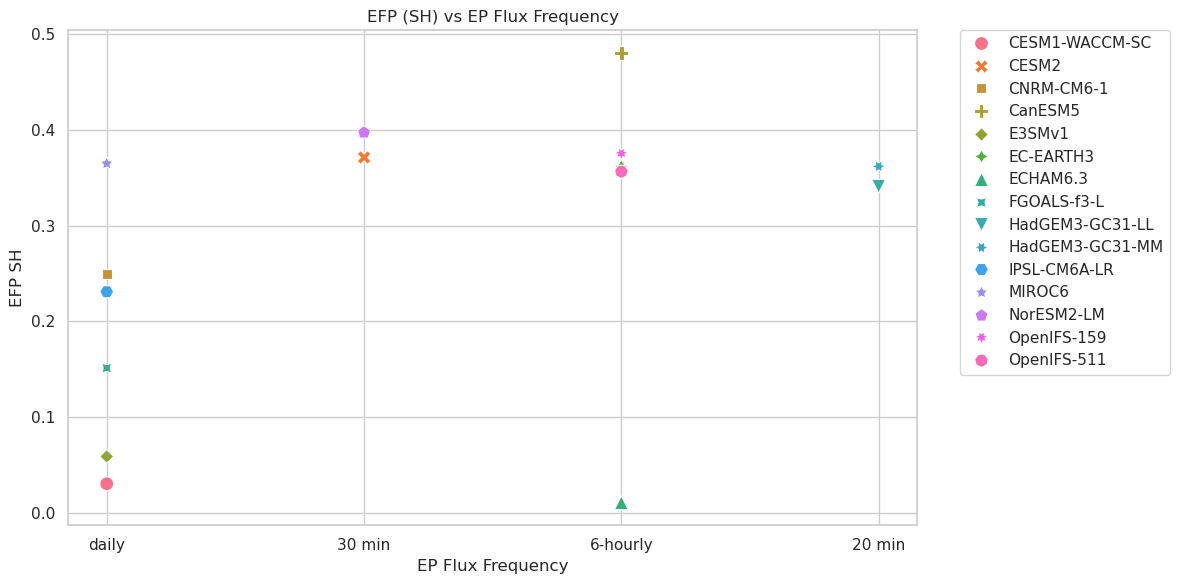

In [21]:
# Set the plot style
sns.set(style="whitegrid")

# Scatter plot for efp_nh
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='EP flux freq.', y='efp_nh', hue='model', style='model', s=100)
plt.title("EFP (NH) vs EP Flux Frequency")
plt.ylabel("EFP NH")
plt.xlabel("EP Flux Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Scatter plot for efp_sh
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='EP flux freq.', y='efp_sh', hue='model', style='model', s=100)
plt.title("EFP (SH) vs EP Flux Frequency")
plt.ylabel("EFP SH")
plt.xlabel("EP Flux Frequency")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()